In [1]:
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("eleutherai/w2s")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

all_runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

In [2]:
run_name = "-xent-"
datasets = [
    "boolq",
    "anli-r2",
    "cosmos_qa",
    "mc_taco",
    "sciq",
    "paws",
    "twitter-sentiment",
    "wic"
]

runs_df = all_runs_df[all_runs_df.name.str.contains(run_name)]
runs_df

,summary,config,name
105,"{'eval/test_loss': 0.27610161900520325, 'eval/...","{'bf16': False, 'fp16': False, 'fsdp': [], 'se...",sw2s-xent-sciq-Meta-Llama-3-8B
106,"{'train_loss': 0.37839815300753993, 'eval/val_...","{'bf16': False, 'fp16': False, 'fsdp': [], 'se...",sw2s-xent-twitter-sentiment-Meta-Llama-3-8B
107,"{'_runtime': 2105.4095447063446, 'train/grad_n...","{'bf16': False, 'fp16': False, 'fsdp': [], 'se...",w2s-xent-sciq-Meta-Llama-3-8B
108,"{'eval/val_auroc': 0.9937924146652222, 'train_...","{'bf16': False, 'fp16': False, 'fsdp': [], 'se...",sw2s-xent-mc_taco-Meta-Llama-3-8B
109,"{'eval/val_auroc': 0.975959300994873, 'eval/te...","{'bf16': False, 'fp16': False, 'fsdp': [], 'se...",w2s-xent-twitter-sentiment-Meta-Llama-3-8B
110,"{'_wandb': {'runtime': 1218}, 'eval/loss': 0.3...","{'bf16': False, 'fp16': False, 'fsdp': [], 'se...",w2s-xent-mc_taco-Meta-Llama-3-8B
111,"{'eval/auroc': 0.7897917628288269, 'eval/test_...","{'bf16': False, 'fp16': False, 'fsdp': [], 'se...",sw2s-xent-wic-Meta-Llama-3-8B
112,"{'eval/val_loss': 0.2346268594264984, 'eval/te...","{'bf16': False, 'fp16': False, 'fsdp': [], 'se...",strong-xent-sciq-Meta-Llama-3-8B
113,"{'_wandb': {'runtime': 701}, 'eval/auroc': 0.7...","{'bf16': False, 'fp16': False, 'fsdp': [], 'se...",w2s-xent-wic-Meta-Llama-3-8B
114,"{'eval/val_runtime': 12.0169, 'train_steps_per...","{'bf16': False, 'fp16': False, 'fsdp': [], 'se...",strong-xent-twitter-sentiment-Meta-Llama-3-8B


/tmp/ipykernel_667762/858633965.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2s_ds_df["iter"] = s2s_ds_df["name"].apply(get_iter_from_name)
/tmp/ipykernel_667762/858633965.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2s_ds_df["iter"] = s2s_ds_df["name"].apply(get_iter_from_name)
/tmp/ipykernel_667762/858633965.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

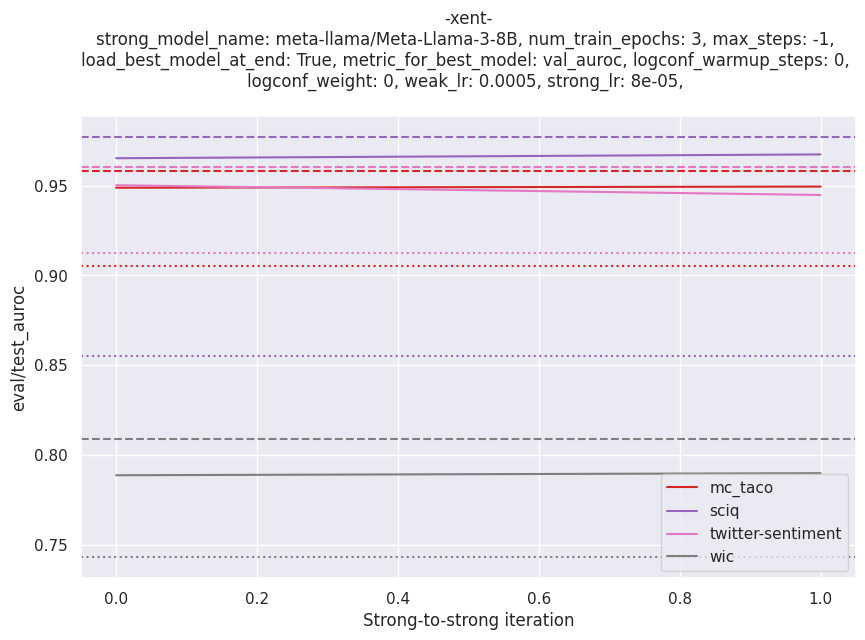

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# x axis: iter
# y axis: eval/test_auroc
# color: dataset

configs_to_report = [
    "strong_model_name",
    "num_train_epochs",
    "max_steps",
    "load_best_model_at_end",
    "metric_for_best_model",
    "logconf_warmup_steps",
    "logconf_weight",
    "weak_lr",
    "strong_lr",
]


def get_config_str(config):
    # newline after every 3rd comma
    comma_count = 0
    multiline = ""
    for k in configs_to_report:
        v = config.get(k, "N/A")
        comma_count += 1
        multiline += f"{k}: {v}, "
        if comma_count % 3 == 0:
            multiline += "\n"
    return multiline


metric = "eval/test_auroc"
config_str = None
colors = sns.color_palette("tab10", len(datasets))
plt.figure(figsize=(10, 6))
for color, ds in zip(colors, datasets):
    ds_df = runs_df[runs_df.name.str.contains(ds)]
    # remove rows without the metric
    s2s_ds_df = ds_df[ds_df.summary.apply(lambda x: metric in x) & (ds_df.name.str.startswith("sw2s-") | ds_df.name.str.startswith("w2s-"))]

    def get_iter_from_name(name):
        if name.startswith("sw2s-"):
            return 1
        return 0
        # iter_idx = name.find("iter")
        # next_under = name.find("_", iter_idx)
        # return int(name[iter_idx+4:next_under])
    
    if len(s2s_ds_df) == 0:
        continue
    for config in s2s_ds_df["config"]:
        if config_str is None:
            config_str = get_config_str(s2s_ds_df.iloc[0]["config"])
        elif config_str != get_config_str(s2s_ds_df.iloc[0]["config"]):
            print("Different configs found!")
            print(get_config_str(s2s_ds_df.iloc[0]["config"]))
            print(config_str)
    
    s2s_ds_df["iter"] = s2s_ds_df["name"].apply(get_iter_from_name)
    
    plt.plot(s2s_ds_df["iter"], s2s_ds_df["summary"].apply(lambda x: x[metric]), label=ds, color=color)


    def get_limit(ceil=True):
        string = "strong-" if ceil else "weak-"
        limit = ds_df[ds_df.name.str.startswith(string)]
        if len(limit) > 0:
            if len(limit) > 1:
                print("Multiple floor runs found!")
            limit = limit.iloc[0]
            return limit["summary"].get(metric, None)
        else:
            # try to get it from all runs
            limit = all_runs_df[
                all_runs_df.name.str.contains(ds) & all_runs_df.name.str.contains(string)
            ]
            if len(limit) == 0:
                print(f"No {string} found for {ds}")
                return None
            limit = limit.iloc[0]
            print(f"Using run {limit['name']} for {string} of {ds}")
            return limit["summary"].get(metric, None)
        
    ceil = get_limit(ceil=True)
    floor = get_limit(ceil=False)
    if ceil is not None:
        plt.axhline(ceil, color=color, linestyle="--")
    if floor is not None:
        plt.axhline(floor, color=color, linestyle=":")

    
plt.legend()
title = f"{run_name}\n{config_str}"
plt.title(title)
plt.xlabel("Strong-to-strong iteration")
plt.ylabel(metric)
plt.show()


Different configs found!
strong_model_name: meta-llama/Meta-Llama-3-8B, num_train_epochs: 3, max_steps: -1, 
load_best_model_at_end: True, metric_for_best_model: val_auroc, logconf_warmup_steps: 80, 
logconf_weight: 0.75, weak_lr: 0.0005, strong_lr: 8e-05, 

strong_model_name: meta-llama/Meta-Llama-3-8B, num_train_epochs: 3, max_steps: -1, 
load_best_model_at_end: True, metric_for_best_model: val_auroc, logconf_warmup_steps: 0, 
logconf_weight: 0, weak_lr: 0.0005, strong_lr: 8e-05, 

Different configs found!
strong_model_name: meta-llama/Meta-Llama-3-8B, num_train_epochs: 3, max_steps: -1, 
load_best_model_at_end: True, metric_for_best_model: val_auroc, logconf_warmup_steps: 80, 
logconf_weight: 0.75, weak_lr: 0.0005, strong_lr: 8e-05, 

strong_model_name: meta-llama/Meta-Llama-3-8B, num_train_epochs: 3, max_steps: -1, 
load_best_model_at_end: True, metric_for_best_model: val_auroc, logconf_warmup_steps: 0, 
logconf_weight: 0, weak_lr: 0.0005, strong_lr: 8e-05, 

Different configs foun

/tmp/ipykernel_667762/2268686848.py:90: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(data=df, x="dataset", y=metric, hue="run_name", palette=colors)


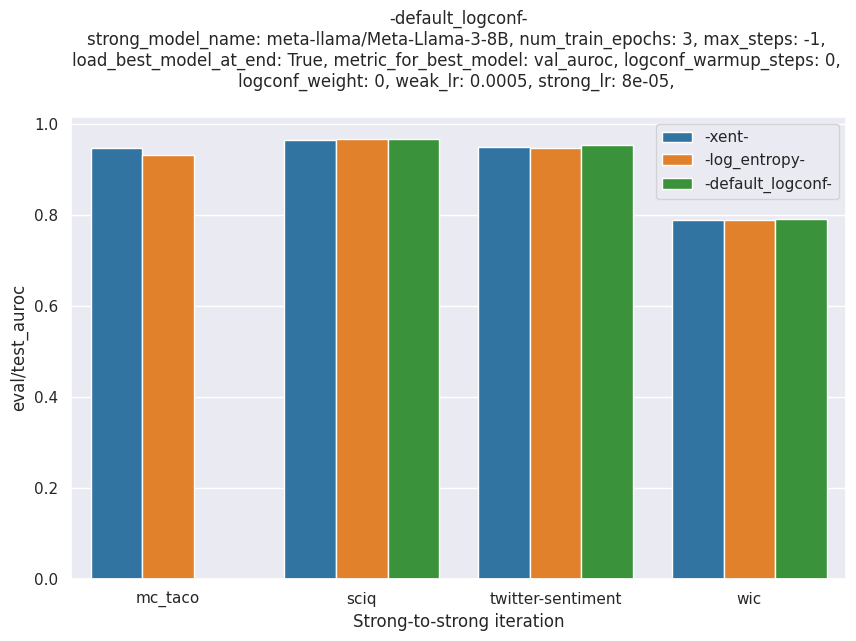

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# comparison barplot

# x axis: dataset
# hue: run name
# y axis: eval/test_auroc
# color: dataset

run_names = ["-xent-", "-log_entropy-", "-default_logconf-"]
datasets = [
    # "boolq",
    # "anli-r2",
    # "cosmos_qa",
    "mc_taco",
    "sciq",
    # "paws",
    "twitter-sentiment",
    "wic"
]



configs_to_report = [
    "strong_model_name",
    "num_train_epochs",
    "max_steps",
    "load_best_model_at_end",
    "metric_for_best_model",
    "logconf_warmup_steps",
    "logconf_weight",
    "weak_lr",
    "strong_lr",
]


def get_config_str(config):
    # newline after every 3rd comma
    comma_count = 0
    multiline = ""
    for k in configs_to_report:
        v = config.get(k, "N/A")
        comma_count += 1
        multiline += f"{k}: {v}, "
        if comma_count % 3 == 0:
            multiline += "\n"
    return multiline


metric = "eval/test_auroc"

config_str = None
df = []
for run_name in run_names:
    runs_df = all_runs_df[all_runs_df.name.str.contains(run_name)]
    for ds in datasets:
        ds_df = runs_df[runs_df.name.str.contains(ds)]
        # remove rows without the metric
        w2s_ds_df = ds_df[ds_df.summary.apply(lambda x: metric in x) & ds_df.name.str.startswith("w2s-")]

        if len(w2s_ds_df) == 0:
            continue
        elif len(w2s_ds_df) > 1:
            print("Multiple runs found!")
            print(w2s_ds_df.name)
            continue
        
        row = w2s_ds_df.iloc[0]
        config = row["config"]
        if config_str is None:
            config_str = get_config_str(w2s_ds_df.iloc[0]["config"])
        elif config_str != get_config_str(w2s_ds_df.iloc[0]["config"]):
            print("Different configs found!")
            print(get_config_str(w2s_ds_df.iloc[0]["config"]))
            print(config_str)
        
        df.append({
            "run_name": run_name,
            "dataset": ds,
            metric: row["summary"][metric],
        })

df = pd.DataFrame(df)

        
plt.figure(figsize=(10, 6))
colors = sns.color_palette("tab10", len(datasets))
sns.barplot(data=df, x="dataset", y=metric, hue="run_name", palette=colors)
    
plt.legend()
title = f"{run_name}\n{config_str}"
plt.title(title)
plt.xlabel("Strong-to-strong iteration")
plt.ylabel(metric)
plt.show()
